In [1]:
#use this to run multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#import general packages
import pandas as pd
import numpy as np
from scipy.stats import zscore

In [3]:
#formatting table outputs
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
#import dataset
df = pd.read_csv('Hotel_Reservations.csv')
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


## Investigate Data

In [5]:
#shape
df.shape

(36275, 19)

In [6]:
#types of variables
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [7]:
# since we will be looking at reservation based on their booking ID, we can make the booking ID the index column
df = pd.read_csv('Hotel_Reservations.csv', index_col = 0)
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
Booking_ID,,,,,,,,,,,,,,,,,,
INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled


## Investigate Missing Data

In [8]:
# investigate whether there is any missing data in the data frame
# the shape rows should equal the count below for each category
df.count()

# since there is no missing data across the columns, no further action is needed

no_of_adults                            36275
no_of_children                          36275
no_of_weekend_nights                    36275
no_of_week_nights                       36275
type_of_meal_plan                       36275
required_car_parking_space              36275
room_type_reserved                      36275
lead_time                               36275
arrival_year                            36275
arrival_month                           36275
arrival_date                            36275
market_segment_type                     36275
repeated_guest                          36275
no_of_previous_cancellations            36275
no_of_previous_bookings_not_canceled    36275
avg_price_per_room                      36275
no_of_special_requests                  36275
booking_status                          36275
dtype: int64

In [9]:
# in another alternative way, we can drop the na and find the shape

df.dropna()
df.shape

# as the output shows, the shape is still the same, meaning that there is no missing data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
Booking_ID,,,,,,,,,,,,,,,,,,
INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled


(36275, 18)

## Identify Outliers

In [10]:
# outliers are those that fall below Q1-1.5IQR and above Q3+1.5IQR
# therefore, we need to find the IQR 

In [11]:
# IQR = Q3 (75%) - Q1 (25%)
# we can get Q3 and Q1 from the describe function
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [12]:
# calculating IQR for each category with integers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

/tmp/ipykernel_29/141424445.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
/tmp/ipykernel_29/141424445.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


no_of_adults                              0.0
no_of_children                            0.0
no_of_weekend_nights                      2.0
no_of_week_nights                         2.0
required_car_parking_space                0.0
lead_time                               109.0
arrival_year                              0.0
arrival_month                             5.0
arrival_date                             15.0
repeated_guest                            0.0
no_of_previous_cancellations              0.0
no_of_previous_bookings_not_canceled      0.0
avg_price_per_room                       39.7
no_of_special_requests                    1.0
dtype: float64

In [13]:
# now we can idenitfy which points are outliers
identify = (df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR))
identify

# the entries with 'True' represent the presence of an outlier

/tmp/ipykernel_29/1392241771.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  identify = (df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR))


,arrival_date,arrival_month,arrival_year,avg_price_per_room,booking_status,lead_time,market_segment_type,no_of_adults,no_of_children,no_of_previous_bookings_not_canceled,no_of_previous_cancellations,no_of_special_requests,no_of_week_nights,no_of_weekend_nights,repeated_guest,required_car_parking_space,room_type_reserved,type_of_meal_plan
Booking_ID,,,,,,,,,,,,,,,,,,
INN00001,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
INN00002,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
INN00003,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
INN00004,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
INN00005,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INN36271,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
INN36272,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
INN36273,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
# now that we know the outliers we can replace them with the median, instead of removing them
identify.loc[identify['lead_time'] == True]

# using the IQR method there are 1331 rows with outliers for lead time

,arrival_date,arrival_month,arrival_year,avg_price_per_room,booking_status,lead_time,market_segment_type,no_of_adults,no_of_children,no_of_previous_bookings_not_canceled,no_of_previous_cancellations,no_of_special_requests,no_of_week_nights,no_of_weekend_nights,repeated_guest,required_car_parking_space,room_type_reserved,type_of_meal_plan
Booking_ID,,,,,,,,,,,,,,,,,,
INN00006,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
INN00097,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
INN00119,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
INN00121,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
INN00171,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INN36140,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
INN36172,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
INN36179,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
identify.loc[identify['no_of_children'] == True]
# using the IQR method there are 2609 rows with outliers for number of children

,arrival_date,arrival_month,arrival_year,avg_price_per_room,booking_status,lead_time,market_segment_type,no_of_adults,no_of_children,no_of_previous_bookings_not_canceled,no_of_previous_cancellations,no_of_special_requests,no_of_week_nights,no_of_weekend_nights,repeated_guest,required_car_parking_space,room_type_reserved,type_of_meal_plan
Booking_ID,,,,,,,,,,,,,,,,,,
INN00033,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
INN00061,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False
INN00081,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
INN00096,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
INN00100,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INN36222,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
INN36228,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
INN36232,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [16]:
# first we can find the 99.9th quantile values for each category 
upper = df.quantile(0.999)
upper

/tmp/ipykernel_29/1461749696.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  upper = df.quantile(0.999)


no_of_adults                               3.00000
no_of_children                             2.00000
no_of_weekend_nights                       5.00000
no_of_week_nights                         11.00000
required_car_parking_space                 1.00000
lead_time                                433.00000
arrival_year                            2018.00000
arrival_month                             12.00000
arrival_date                              31.00000
repeated_guest                             1.00000
no_of_previous_cancellations               5.00000
no_of_previous_bookings_not_canceled      28.00000
avg_price_per_room                       265.31944
no_of_special_requests                     4.00000
Name: 0.999, dtype: float64

In [17]:
# than we also need to find the median (what we replace the outlier with)
median = df.median()
median

/tmp/ipykernel_29/25199111.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = df.median()


no_of_adults                               2.00
no_of_children                             0.00
no_of_weekend_nights                       1.00
no_of_week_nights                          2.00
required_car_parking_space                 0.00
lead_time                                 57.00
arrival_year                            2018.00
arrival_month                              8.00
arrival_date                              16.00
repeated_guest                             0.00
no_of_previous_cancellations               0.00
no_of_previous_bookings_not_canceled       0.00
avg_price_per_room                        99.45
no_of_special_requests                     0.00
dtype: float64

In [18]:
# make a copy first
# we dont do it for the dates, or repeated guests
df1 = df
df1["no_of_adults"] = np.where(df1["no_of_adults"] > 3, 2, df1["no_of_adults"])
df1["no_of_children"] = np.where(df1["no_of_children"] > 2, 0, df1["no_of_children"])
df1["no_of_weekend_nights"] = np.where(df1["no_of_weekend_nights"] > 5, 1, df1["no_of_weekend_nights"])
df1["no_of_week_nights"] = np.where(df1["no_of_week_nights"] > 11, 2, df1["no_of_week_nights"])
df1["required_car_parking_space"] = np.where(df1["required_car_parking_space"] > 1, 0, df1["required_car_parking_space"])
df1["lead_time"] = np.where(df1["lead_time"] > 433, 57, df1["lead_time"])
df1["no_of_previous_cancellations"] = np.where(df1["no_of_previous_cancellations"] > 5, 0, df1["no_of_previous_cancellations"])
df1["no_of_previous_bookings_not_canceled"] = np.where(df1["no_of_previous_bookings_not_canceled"] > 28, 0, df1["no_of_previous_bookings_not_canceled"])
df1["avg_price_per_room"] = np.where(df1["avg_price_per_room"] > 265.31944, 99.45, df1["avg_price_per_room"])
df1["no_of_special_requests"] = np.where(df1["no_of_special_requests"] > 4, 0, df1["no_of_special_requests"])

df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
Booking_ID,,,,,,,,,,,,,,,,,,
INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled


## Data Cleaning

### Transforming Data

In [19]:
# a first transformation is the total number of nights
# this is calculated by adding the number of week nights with number of weekend nights per booking
df['total_nights'] = df['no_of_weekend_nights'] + df['no_of_week_nights']

# another transformation is finding the total number of people
df['total_people'] = df['no_of_adults'] + df['no_of_children']

df['total_price'] = df['avg_price_per_room'] * df['total_nights']

df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights,total_people,total_price
Booking_ID,,,,,,,,,,,,,,,,,,,,,
INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,3,2,195.00
INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,5,2,533.40
INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,3,1,180.00
INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2,2,200.00
INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2,2,189.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled,8,3,1342.40
INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled,4,2,363.80
INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled,8,2,787.12


In [20]:
# another type of transformation is to combine the year, month and date
cols=["arrival_year","arrival_month","arrival_date"]
df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df

# the date is found at the end 

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights,total_people,total_price,date
Booking_ID,,,,,,,,,,,,,,,,,,,,,,
INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,3,2,195.00,2017-10-2
INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,5,2,533.40,2018-11-6
INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,3,1,180.00,2018-2-28
INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2,2,200.00,2018-5-20
INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2,2,189.00,2018-4-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled,8,3,1342.40,2018-8-3
INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled,4,2,363.80,2018-10-17
INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled,8,2,787.12,2018-7-1


### Sorted Data

In [21]:
##Group: Cancelled bookings versus Not Cancelled bookings
df.booking_status[df.booking_status=='Not_Canceled'] = 0
df.booking_status[df.booking_status=='Canceled'] = 1
df.head()

/tmp/ipykernel_29/765522189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.booking_status[df.booking_status=='Not_Canceled'] = 0
/tmp/ipykernel_29/765522189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.booking_status[df.booking_status=='Canceled'] = 1


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights,total_people,total_price,date
Booking_ID,,,,,,,,,,,,,,,,,,,,,,
INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0,3,2,195.0,2017-10-2
INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0,5,2,533.4,2018-11-6
INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1,3,1,180.0,2018-2-28
INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1,2,2,200.0,2018-5-20
INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1,2,2,189.0,2018-4-11


In [22]:
df.room_type_reserved[df.room_type_reserved=='Room_Type 1'] = 1
df.room_type_reserved[df.room_type_reserved=='Room_Type 2'] = 2
df.room_type_reserved[df.room_type_reserved=='Room_Type 3'] = 3
df.room_type_reserved[df.room_type_reserved=='Room_Type 4'] = 4
df.room_type_reserved[df.room_type_reserved=='Room_Type 5'] = 5
df.room_type_reserved[df.room_type_reserved=='Room_Type 6'] = 6
df.room_type_reserved[df.room_type_reserved=='Room_Type 7'] = 7

df.type_of_meal_plan[df.type_of_meal_plan=='Meal Plan 1'] = 1
df.type_of_meal_plan[df.type_of_meal_plan=='Meal Plan 2'] = 2
df.type_of_meal_plan[df.type_of_meal_plan=='Meal Plan 3'] = 3
df.type_of_meal_plan[df.type_of_meal_plan=='Not Selected'] = 0

df.market_segment_type[df.market_segment_type=='Aviation'] = 1
df.market_segment_type[df.market_segment_type=='Complementary'] = 2
df.market_segment_type[df.market_segment_type=='Corporate'] = 3
df.market_segment_type[df.market_segment_type=='Offline'] = 4
df.market_segment_type[df.market_segment_type=='Online'] = 5

df.booking_status[df.booking_status=='1'] = 1
df.booking_status[df.booking_status=='0'] = 0



df.head()

/tmp/ipykernel_29/4080803246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.room_type_reserved[df.room_type_reserved=='Room_Type 1'] = 1
/tmp/ipykernel_29/4080803246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.room_type_reserved[df.room_type_reserved=='Room_Type 2'] = 2
/tmp/ipykernel_29/4080803246.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.room_type_reserved[df.room_type_reserved=='Room_Type 3'] = 3
/tmp

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights,total_people,total_price,date
Booking_ID,,,,,,,,,,,,,,,,,,,,,,
INN00001,2,0,1,2,1,0,1,224,2017,10,2,4,0,0,0,65.00,0,0,3,2,195.0,2017-10-2
INN00002,2,0,2,3,0,0,1,5,2018,11,6,5,0,0,0,106.68,1,0,5,2,533.4,2018-11-6
INN00003,1,0,2,1,1,0,1,1,2018,2,28,5,0,0,0,60.00,0,1,3,1,180.0,2018-2-28
INN00004,2,0,0,2,1,0,1,211,2018,5,20,5,0,0,0,100.00,0,1,2,2,200.0,2018-5-20
INN00005,2,0,1,1,0,0,1,48,2018,4,11,5,0,0,0,94.50,0,1,2,2,189.0,2018-4-11


In [23]:
#Duplicating column
df = df.assign(booking_status_original=df['booking_status'])
df.booking_status_original[df.booking_status_original==0] = 'Not Canceled'
df.booking_status_original[df.booking_status_original==1] = "Canceled"
df.head()

/tmp/ipykernel_29/1382336571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.booking_status_original[df.booking_status_original==0] = 'Not Canceled'
/tmp/ipykernel_29/1382336571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.booking_status_original[df.booking_status_original==1] = "Canceled"


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights,total_people,total_price,date,booking_status_original
Booking_ID,,,,,,,,,,,,,,,,,,,,,,,
INN00001,2,0,1,2,1,0,1,224,2017,10,2,4,0,0,0,65.00,0,0,3,2,195.0,2017-10-2,Not Canceled
INN00002,2,0,2,3,0,0,1,5,2018,11,6,5,0,0,0,106.68,1,0,5,2,533.4,2018-11-6,Not Canceled
INN00003,1,0,2,1,1,0,1,1,2018,2,28,5,0,0,0,60.00,0,1,3,1,180.0,2018-2-28,Canceled
INN00004,2,0,0,2,1,0,1,211,2018,5,20,5,0,0,0,100.00,0,1,2,2,200.0,2018-5-20,Canceled
INN00005,2,0,1,1,0,0,1,48,2018,4,11,5,0,0,0,94.50,0,1,2,2,189.0,2018-4-11,Canceled


In [24]:
#Group generation
bookinggroups = df.groupby('booking_status_original')

In [25]:
##Filtering Group: Removing observations that do not have a cancelled booking
canceledbooking = bookinggroups.get_group('Canceled').sort_values('no_of_previous_cancellations', ascending = True)
canceledbooking

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights,total_people,total_price,date,booking_status_original
Booking_ID,,,,,,,,,,,,,,,,,,,,,,,
INN00003,1,0,2,1,1,0,1,1,2018,2,28,5,0,0,0,60.00,0,1,3,1,180.00,2018-2-28,Canceled
INN24316,2,0,0,4,1,0,1,79,2018,11,30,5,0,0,0,88.40,2,1,4,2,353.60,2018-11-30,Canceled
INN24321,2,0,0,3,1,0,2,221,2018,8,10,5,0,0,0,86.75,0,1,3,2,260.25,2018-8-10,Canceled
INN24323,1,0,1,0,1,0,1,36,2018,10,16,5,0,0,0,107.10,1,1,1,1,107.10,2018-10-16,Canceled
INN24326,2,0,0,3,1,1,1,157,2018,8,10,5,0,0,0,123.30,2,1,3,2,369.90,2018-8-10,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INN22051,1,0,0,3,1,0,1,322,2018,9,1,5,1,1,0,100.80,0,1,3,1,302.40,2018-9-1,Canceled
INN25378,1,0,0,1,1,0,1,361,2018,11,4,5,1,1,0,91.00,0,1,1,1,91.00,2018-11-4,Canceled
INN29527,1,0,0,1,1,0,1,361,2018,11,4,5,1,1,0,91.00,0,1,1,1,91.00,2018-11-4,Canceled


In [26]:
##Sorting and Grouping: Using Market_Segment_type information to aggregate observations, then sorting them with other variables
segmentbooking = canceledbooking.sort_values(by=['market_segment_type'], ascending = [True])
segmentbooking

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights,total_people,total_price,date,booking_status_original
Booking_ID,,,,,,,,,,,,,,,,,,,,,,,
INN26678,1,0,5,10,1,0,1,11,2018,5,9,1,0,0,0,95.00,0,1,15,1,1425.00,2018-5-9,Canceled
INN11336,1,0,5,10,1,0,1,11,2018,5,9,1,0,0,0,95.00,0,1,15,1,1425.00,2018-5-9,Canceled
INN11586,1,0,5,10,1,0,1,11,2018,5,9,1,0,0,0,95.00,0,1,15,1,1425.00,2018-5-9,Canceled
INN30746,1,0,0,1,1,0,1,1,2018,5,25,1,0,0,0,95.00,0,1,1,1,95.00,2018-5-25,Canceled
INN33480,1,0,0,1,1,0,4,3,2018,11,10,1,0,0,0,95.00,0,1,1,1,95.00,2018-11-10,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INN28151,2,1,0,1,1,0,1,110,2018,6,3,5,0,0,0,143.10,0,1,1,3,143.10,2018-6-3,Canceled
INN28152,2,0,2,1,1,0,4,32,2018,9,11,5,0,0,0,149.40,0,1,3,2,448.20,2018-9-11,Canceled
INN28153,2,1,0,2,1,0,1,151,2018,12,30,5,0,0,0,143.38,1,1,2,3,286.76,2018-12-30,Canceled


In [27]:
#Creating segment groups
segmentsort = canceledbooking.groupby(['market_segment_type', 'total_nights', 'total_people'])
segmentsummary = segmentsort.mean()
segmentsummary

/tmp/ipykernel_29/268220127.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segmentsummary = segmentsort.mean()


no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  required_car_parking_space   lead_time  arrival_year  arrival_month  arrival_date  repeated_guest  no_of_previous_cancellations  no_of_previous_bookings_not_canceled  avg_price_per_room  no_of_special_requests  total_price
market_segment_type total_nights total_people                                                                                                                                                                                                                                                                                                       
1                   1            1                      1.0             0.0              0.230769           0.769231                    0.000000    8.538462        2018.0       7.307692     22.307692             0.0                           0.0                                   0.0          106.538462                0.000000   106.538462
                    2            1                      1.0             0.0              0.333333           1.666667                    0.000000    3.000000        2018.0       8.333333     11.000000             0.0                           0.0                                   0.0          104.666667                0.000000   209.333333
                    3            1                      1.0             0.0              1.333333           1.666667                    0.000000   10.333333        2018.0      10.333333      9.666667             0.0                           0.0                                   0.0          100.000000                0.000000   300.000000
                    4            1                      1.0             0.0              1.000000           3.000000                    0.000000    5.000000        2018.0       7.000000     10.333333             0.0                           0.0                                   0.0           89.666667                0.000000   358.666667
                    8            1                      1.0             0.0              2.000000           6.000000                    0.000000    1.000000        2018.0       4.000000     12.000000             0.0                           0.0                                   0.0           95.000000                0.000000   760.000000
...                                                     ...             ...                   ...                ...                         ...         ...           ...            ...           ...             ...                           ...                                   ...                 ...                     ...          ...
5                   15           2                      2.0             0.0              4.333333          10.666667                    0.166667  102.833333        2018.0       7.833333     21.666667             0.0                           0.0                                   0.0           97.725000                1.166667  1465.875000
                                 3                      3.0             0.0              4.000000          11.000000                    0.000000   90.000000        2018.0       8.000000     16.000000             0.0                           0.0                                   0.0          150.300000                0.000000  2254.500000
                                 4                      2.0             2.0              5.000000          10.000000                    0.000000   28.000000        2018.0       2.000000      1.000000             0.0                           0.0                                   0.0          152.530000                0.000000  2287.950000
                    16           1                      1.0             0.0              5.000000          11.000000                    0.000000   35.000000        2018.0      11.500000      7.500000             0.0                           0.0                                   0.0           68

## Machine Learning

### Data Preparation

In [28]:
#libraries
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [29]:
#classification lib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

from sklearn import utils
from sklearn import preprocessing

In [30]:
#regression lib
import numpy as np
from numpy import arange
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [31]:
df_encoded_data = pd.get_dummies(df, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'])
df_encoded_data

/tmp/ipykernel_29/2735727682.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_encoded_data = pd.get_dummies(df, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'])
/tmp/ipykernel_29/2735727682.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_encoded_data = pd.get_dummies(df, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'])
/tmp/ipykernel_29/2735727682.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_encoded_data = pd.get_dummies(df, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'])


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights,total_people,total_price,date,booking_status_original,type_of_meal_plan_0,type_of_meal_plan_1,type_of_meal_plan_2,type_of_meal_plan_3,room_type_reserved_1,room_type_reserved_2,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,room_type_reserved_7,market_segment_type_1,market_segment_type_2,market_segment_type_3,market_segment_type_4,market_segment_type_5
Booking_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
INN00001,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0,0,3,2,195.00,2017-10-2,Not Canceled,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
INN00002,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1,0,5,2,533.40,2018-11-6,Not Canceled,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
INN00003,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0,1,3,1,180.00,2018-2-28,Canceled,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
INN00004,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0,1,2,2,200.00,2018-5-20,Canceled,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
INN00005,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0,1,2,2,189.00,2018-4-11,Canceled,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INN36271,3,0,2,6,0,85,2018,8,3,0,0,0,167.80,1,0,8,3,1342.40,2018-8-3,Not Canceled,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
INN36272,2,0,1,3,0,228,2018,10,17,0,0,0,90.95,2,1,4,2,363.80,2018-10-17,Canceled,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
INN36273,2,0,2,6,0,148,2018,7,1,0,0,0,98.39,2,0,8,2,787.12,2018-7-1,Not Canceled,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


### Transform and Drop variables

In [32]:
#meal plan
df['market_segment_type'] = df['market_segment_type'].apply(lambda x: int(x))
#room type
df['room_type_reserved'] = df['room_type_reserved'].apply(lambda x: int(x))
#segment
df['type_of_meal_plan'] = df['type_of_meal_plan'].apply(lambda x: int(x))
#date and booking status
df.drop(["date", "booking_status_original"], axis=1, inplace=True)
df['booking_status'] = df['booking_status'].apply(lambda x: int(x))

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36275 entries, INN00001 to INN36275
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int64  
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_seg

In [34]:
df = df.reindex(columns = [col for col in df.columns if col != 'booking_status'] + ['booking_status'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36275 entries, INN00001 to INN36275
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int64  
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_seg

In [35]:
###separate predictors from the target (booking status)
#get vals of frame
array = df.values
array

array([[  2.  ,   0.  ,   1.  , ...,   2.  , 195.  ,   0.  ],
       [  2.  ,   0.  ,   2.  , ...,   2.  , 533.4 ,   0.  ],
       [  1.  ,   0.  ,   2.  , ...,   1.  , 180.  ,   1.  ],
       ...,
       [  2.  ,   0.  ,   2.  , ...,   2.  , 787.12,   0.  ],
       [  2.  ,   0.  ,   0.  , ...,   2.  , 283.5 ,   1.  ],
       [  2.  ,   0.  ,   1.  , ...,   2.  , 485.01,   0.  ]])

In [36]:
#predictors
X = array[:, 0:20]
print(X)

[[  2.     0.     1.   ...   3.     2.   195.  ]
 [  2.     0.     2.   ...   5.     2.   533.4 ]
 [  1.     0.     2.   ...   3.     1.   180.  ]
 ...
 [  2.     0.     2.   ...   8.     2.   787.12]
 [  2.     0.     0.   ...   3.     2.   283.5 ]
 [  2.     0.     1.   ...   3.     2.   485.01]]


In [37]:
#target
y = array[:, 20]
print(y)

[0. 0. 1. ... 0. 1. 0.]


In [38]:
###test and training
test_size = 0.20
seed = 7

In [39]:
#random selection and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [40]:
#encoding
labelencoder = preprocessing.LabelEncoder()
train_y = labelencoder.fit_transform(y_train)
#verification
print(utils.multiclass.type_of_target(train_y))

binary


In [41]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[  2.     0.     2.   ...   6.     2.   975.  ]
 [  2.     2.     0.   ...   3.     4.   531.9 ]
 [  2.     0.     1.   ...   4.     2.   378.  ]
 ...
 [  2.     0.     2.   ...   5.     2.   571.5 ]
 [  2.     0.     1.   ...   3.     2.   166.77]
 [  2.     0.     2.   ...   4.     2.   272.  ]]
[[2.0000e+00 0.0000e+00 1.0000e+00 ... 3.0000e+00 2.0000e+00 4.4316e+02]
 [2.0000e+00 0.0000e+00 0.0000e+00 ... 2.0000e+00 2.0000e+00 2.3000e+02]
 [1.0000e+00 0.0000e+00 1.0000e+00 ... 1.0000e+00 1.0000e+00 8.5000e+01]
 ...
 [1.0000e+00 2.0000e+00 2.0000e+00 ... 5.0000e+00 3.0000e+00 1.0750e+03]
 [2.0000e+00 0.0000e+00 2.0000e+00 ... 7.0000e+00 2.0000e+00 8.3895e+02]
 [1.0000e+00 0.0000e+00 2.0000e+00 ... 3.0000e+00 1.0000e+00 3.8400e+02]]
[0. 1. 0. ... 0. 0. 0.]
[0. 1. 0. ... 1. 1. 1.]


## Classification

#### Begin running code for Classification here. We had issues running Classification and Regression in one go, if that problem persists, run Classification and Regression separately. In other words, run the above code, and then either run Classification or skip down to where Regression begins and run Regression.

In [42]:
#available algorithms
models = []
#models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))

In [43]:
#evaluations
results = []
names = []
for name, model in models:
    #define how to split
    kfold =KFold(n_splits=10, shuffle=True, random_state=seed)
    #train model
    cvresults = cross_val_score(model, X_train, train_y, cv=kfold, scoring='accuracy', error_score='raise')
    results.append(cvresults)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cvresults.mean(), cvresults.std())
    print(msg)

LDA: 0.790558 (0.007459)
KNN: 0.797829 (0.006494)
CART: 0.865679 (0.004463)
NB: 0.434425 (0.016051)


In [44]:
##note for group, LR and SVM literally caused my computer/kernel to crash so idk how we want to do that or check it

In [45]:
#compare results
print(results)

[array([0.79531358, 0.78221916, 0.77498277, 0.79427981, 0.79703653,
       0.79910407, 0.79703653, 0.78635424, 0.79359063, 0.78566506]), array([0.80048243, 0.78807719, 0.78911096, 0.80254997, 0.79152309,
       0.80392833, 0.80323915, 0.80323915, 0.80461751, 0.79152309]), array([0.86492074, 0.86905582, 0.85906272, 0.86526533, 0.85906272,
       0.86388697, 0.86698828, 0.87525844, 0.86733287, 0.86595451]), array([0.4210889 , 0.44796692, 0.452102  , 0.41488629, 0.4383184 ,
       0.40351482, 0.44555479, 0.45485872, 0.4314266 , 0.43452791])]


Text(0.5, 0.98, 'algorithm comparison')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f07aa152b90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f07aa1530d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f07aa1528f0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f07aa153610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f07aa1538b0>,
 'means': []}

[Text(1, 0, 'LDA'), Text(2, 0, 'KNN'), Text(3, 0, 'CART'), Text(4, 0, 'NB')]

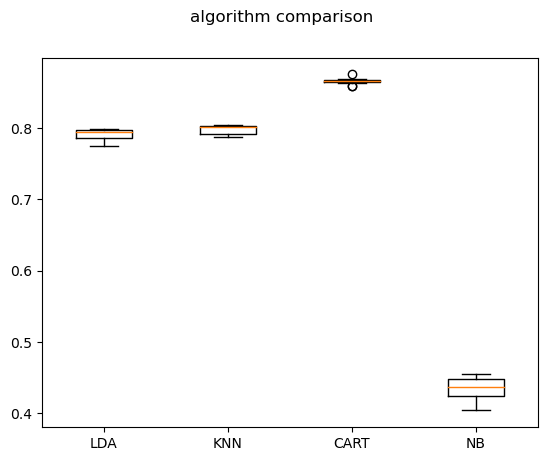

In [46]:
fig = plt.figure()
fig.suptitle('algorithm comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [47]:
#make predictions: knn
knn = KNeighborsClassifier()
knn.fit(X_train, train_y)
predictionsknn = knn.predict(X_test)
print(predictionsknn)

KNeighborsClassifier()

[0 1 0 ... 1 1 1]


In [48]:
#make predictions: cart
cart = DecisionTreeClassifier()
cart.fit(X_train, train_y)
predictionscart = cart.predict(X_test)
print(predictionscart)

DecisionTreeClassifier()

[0 1 0 ... 1 1 1]


In [49]:
#used this to see if y_test is multiclass, and if so, to convert to a Numpy Array
test_y = np.array(y_test).astype(int)

#### For the following two cells, you are looking at evaluating three different metrics in your analysis. The accuracy score, the confusion matrix, and the classification report.

#### Our classification problem is run as a multi-class system (i.e., we have 6 classes being evaluated instead of the regular 2 for a confusion matrix) Because of this, the typical heat-map that would be printed for the matrix will not be printed here.

In [50]:
#evaluate accuracy: knn

print("Accuracy Score:", accuracy_score(test_y, predictionsknn))
print("Confusion Matrix:", confusion_matrix(test_y, predictionsknn))
print("Classification Report:", classification_report(test_y, predictionsknn))

Accuracy Score: 0.8022053756030324
Confusion Matrix: [[4303  548]
 [ 887 1517]]
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.89      0.86      4851
           1       0.73      0.63      0.68      2404

    accuracy                           0.80      7255
   macro avg       0.78      0.76      0.77      7255
weighted avg       0.80      0.80      0.80      7255



In [51]:
#evaluate accuracy: cart
print(y_test)

print(accuracy_score(test_y, predictionscart))
print(confusion_matrix(test_y, predictionscart))
print(classification_report(test_y, predictionscart))

[0. 1. 0. ... 1. 1. 1.]
0.8640937284631289
[[4370  481]
 [ 505 1899]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4851
           1       0.80      0.79      0.79      2404

    accuracy                           0.86      7255
   macro avg       0.85      0.85      0.85      7255
weighted avg       0.86      0.86      0.86      7255



### Regression

In [52]:
#test options and metrics
num_folds = 10
seed = 42

scoring = 'neg_mean_squared_error'

In [53]:
# Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
#models.append(('SVR', SVR()))

In [54]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    # define how to split off validation data
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.150298 (0.002599)
LASSO: -0.173297 (0.003507)
RIDGE: -0.150298 (0.002599)
EN: -0.172423 (0.003469)
KNN: -0.145986 (0.004563)
CART: -0.132306 (0.005943)


[array([-0.14882359, -0.1503554 , -0.15103816, -0.15139885, -0.14563627,
       -0.15129466, -0.15182933, -0.15445068, -0.14605169, -0.15210257]), array([-0.17435093, -0.16957043, -0.17677639, -0.17380246, -0.16712654,
       -0.1704086 , -0.17228754, -0.17905378, -0.17250224, -0.17709022]), array([-0.14882357, -0.15035485, -0.15103898, -0.15139845, -0.14563595,
       -0.15129401, -0.15182911, -0.15445068, -0.14605246, -0.15210286]), array([-0.17296244, -0.16892871, -0.17591005, -0.17329928, -0.16621598,
       -0.16976725, -0.17168014, -0.17837509, -0.17121861, -0.17587529]), array([-0.14563749, -0.13847002, -0.15427981, -0.14962095, -0.13979325,
       -0.14886285, -0.14646451, -0.14923501, -0.14270159, -0.14479669]), array([-0.12598142, -0.13262213, -0.14304229, -0.13714153, -0.12224835,
       -0.13263533, -0.13585049, -0.13729373, -0.12871946, -0.12752435])]


Text(0.5, 0.98, 'Algorithm Comparison')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f07aa09fd90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f07aa0d8310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f07aa09faf0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f07aa0d8850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f07aa0d8af0>,
 'means': []}

[Text(1, 0, 'LR'),
 Text(2, 0, 'LASSO'),
 Text(3, 0, 'RIDGE'),
 Text(4, 0, 'EN'),
 Text(5, 0, 'KNN'),
 Text(6, 0, 'CART')]

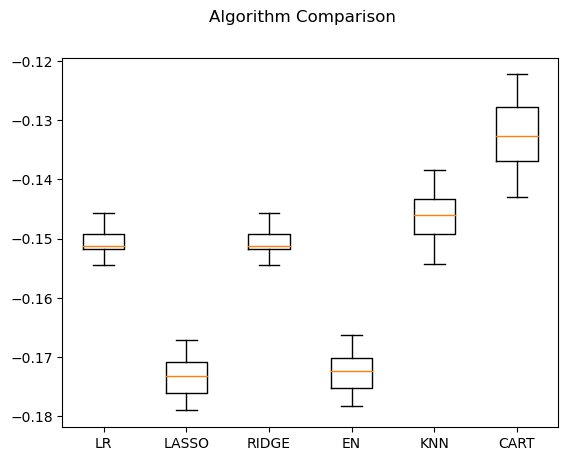

In [55]:
# Compare Algorithms
print(results)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

In [56]:
# Standardize the dataset first
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler',
StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler',
StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler',
StandardScaler()),('RIDGE', Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler',
StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler',
StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler',
StandardScaler()),('CART', DecisionTreeRegressor())])))
#pipelines.append(('ScaledSVR', Pipeline([('Scaler',
#StandardScaler()),('SVR', SVR())])))

In [57]:
# evaluate each model in turn
results = []
names = []
for name, model in pipelines:
    # define how to split off validation data
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.150319 (0.002612)
ScaledLASSO: -0.219992 (0.003400)
ScaledRIDGE: -0.150298 (0.002599)
ScaledEN: -0.219992 (0.003400)
ScaledKNN: -0.114966 (0.004912)
ScaledCART: -0.131504 (0.005421)


[array([-0.14880373, -0.15037624, -0.15104609, -0.15143323, -0.14566294,
       -0.15141636, -0.15191308, -0.15447368, -0.146018  , -0.15204525]), array([-0.22320194, -0.21592889, -0.2204353 , -0.21687092, -0.21639946,
       -0.21971841, -0.21616406, -0.22563167, -0.22139426, -0.22417116]), array([-0.14882374, -0.15035521, -0.15103814, -0.15139888, -0.14563625,
       -0.1512938 , -0.15182974, -0.15445056, -0.14605197, -0.1521027 ]), array([-0.22320194, -0.21592889, -0.2204353 , -0.21687092, -0.21639946,
       -0.21971841, -0.21616406, -0.22563167, -0.22139426, -0.22417116]), array([-0.11192281, -0.1093315 , -0.11855272, -0.11678842, -0.10938663,
       -0.11055824, -0.11725706, -0.12354238, -0.11106823, -0.12125431]), array([-0.12344509, -0.13263078, -0.13976783, -0.13565788, -0.1214784 ,
       -0.13229477, -0.13731499, -0.13030875, -0.12942003, -0.13271937])]


Text(0.5, 0.98, 'Scaled Algorithm Comparison')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f07a9fc1540>,
 'caps': [<matplotlib.lines.Line2D at 0x7f07a9fc1a80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f07a9fc12a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f07a9fc1fc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f07a9fc2260>,
 'means': []}

[Text(1, 0, 'ScaledLR'),
 Text(2, 0, 'ScaledLASSO'),
 Text(3, 0, 'ScaledRIDGE'),
 Text(4, 0, 'ScaledEN'),
 Text(5, 0, 'ScaledKNN'),
 Text(6, 0, 'ScaledCART')]

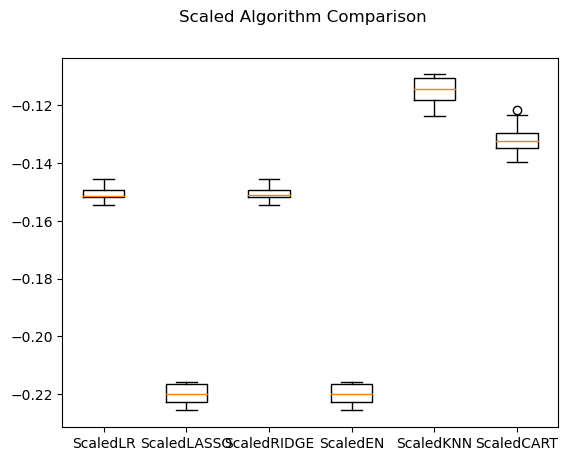

In [58]:
# Compare Algorithms
print(results)
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

In [59]:
# Compute mean and std dev to be used for later scaling
scaler = StandardScaler().fit(X_train)
# Perform standardization by centering and scaling
rescaledX_train = scaler.transform(X_train)
# Possible values for k
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
# grid of parameters (as dictionary as required later)
param_grid = dict(n_neighbors=k_values)
# set model to KNN regressor
model = KNeighborsRegressor()


In [60]:
# set up kfold for cross validation
kfold = KFold(n_splits=num_folds, random_state=None)
# set up grid search to try each given value of k
# using cross validation
grid = GridSearchCV(estimator=model,
param_grid=param_grid, scoring=scoring, cv=kfold)
# fit training data and get results
grid_result = grid.fit(rescaledX_train, y_train)
# best result
print("Best: %f using %s" % (grid_result.best_score_,
grid_result.best_params_))

Best: -0.113178 using {'n_neighbors': 9}


In [61]:
# all
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-0.159235 (0.004452) with: {'n_neighbors': 1}
-0.122008 (0.002948) with: {'n_neighbors': 3}
-0.115621 (0.002272) with: {'n_neighbors': 5}
-0.114048 (0.001910) with: {'n_neighbors': 7}
-0.113178 (0.001970) with: {'n_neighbors': 9}
-0.113672 (0.002186) with: {'n_neighbors': 11}
-0.114026 (0.002390) with: {'n_neighbors': 13}
-0.114048 (0.002531) with: {'n_neighbors': 15}
-0.114713 (0.002356) with: {'n_neighbors': 17}
-0.115412 (0.002516) with: {'n_neighbors': 19}
-0.115838 (0.002445) with: {'n_neighbors': 21}


Text(0.5, 0, 'Number of Neighbors K')

Text(0, 0.5, 'Neg Mean Squared Error')

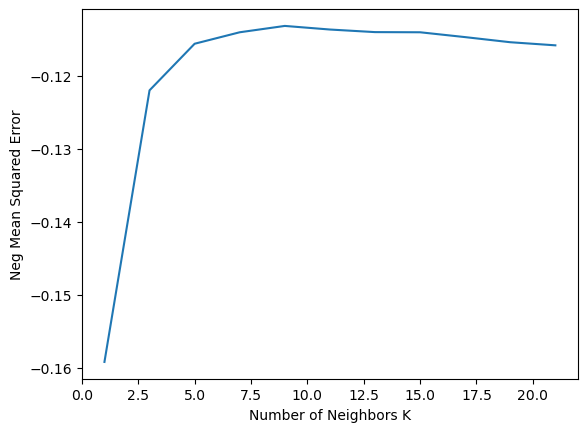

In [62]:
# plot k vs error
plt.plot(k_values, means)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Neg Mean Squared Error')
plt.show()

In [69]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX_train = scaler.transform(X_train)
# calculate estimates for test dataset
# instantiate learning model
model = KNeighborsRegressor(n_neighbors=5)
# fitting the model
model.fit(rescaledX_train, y_train)

KNeighborsRegressor()

In [70]:
# transform the test dataset
rescaledX_test = scaler.transform(X_test)
# estimate the response
estimates = model.predict(rescaledX_test)
print(estimates)
# evaluate performance
print(y_test)
print(mean_squared_error(y_test, estimates))

[0.  1.  0.  ... 0.8 1.  1. ]
[0. 1. 0. ... 1. 1. 1.]
0.11319641626464509
